In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model, svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,BayesianRidge
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import pca as pca


df = pd.read_csv("train.csv")

In [2]:
feature_arr = df[["budget","popularity"]].dropna()
pop_ind = np.argwhere(np.array(df["popularity"]) < 60).reshape(2988,)
y_arr = np.array(df["revenue"])[pop_ind]
print(pop_ind)
print(feature_arr["budget"])

[   0    1    3 ... 2997 2998 2999]
0       14000000
1       40000000
2        3300000
3        1200000
4              0
          ...   
2995           0
2996           0
2997    65000000
2998    42000000
2999    35000000
Name: budget, Length: 3000, dtype: int64


In [3]:
def graph(col: str):
    X_arr = np.array(feature_arr[col])[pop_ind].reshape(2988,1)
    X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, random_state=42, test_size=0.2)
    plt.scatter(X_train,y_train)
    plt.xlabel(col.capitalize())
    plt.ylabel("Revenue")
    plt.title(col.capitalize()+" Training Data")
    plt.show()

    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_train)
    print("Mean squared error on train: ", mean_squared_error(y_train, y_pred))
    print("R\u00b2 score on train: ", r2_score(y_train, y_pred))

    y_pred = regr.predict(X_test)
    print("Mean squared error on test: ", mean_squared_error(y_test, y_pred))
    print("R\u00b2 score on test: ", r2_score(y_test, y_pred))

    print("Coefficient parameter: ",regr.coef_)
    print("Intercept parameter: ",regr.intercept_)
    

In [4]:
def lin_reg(col:str):
    X_arr = np.array(feature_arr[col])[pop_ind].reshape(2988,1)
    X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, random_state=42, test_size=0.2)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    plt.scatter(X_train,y_train, color="orange",label="Train")
    plt.scatter(X_test, y_test, color="black",label="Test")
    plt.plot(X_test, y_pred, color="blue", linewidth=3)
    plt.xlabel(col.capitalize())
    plt.ylabel("Revenue")
    plt.title(col.capitalize()+" Linear Regression")
    plt.legend()
    plt.show()

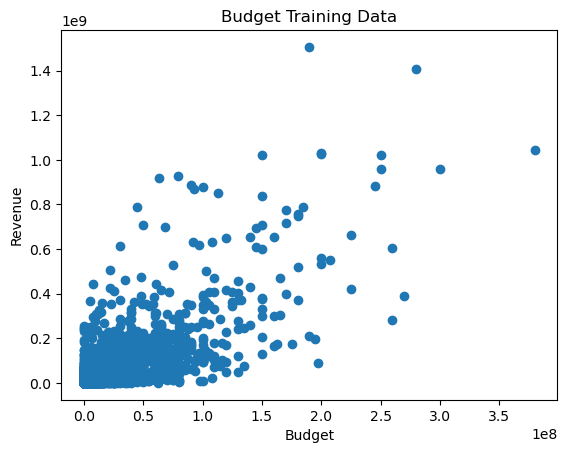

Mean squared error on train:  7690338684783176.0
R² score on train:  0.5458058117847442
Mean squared error on test:  6226919748213942.0
R² score on test:  0.6221464331039206
Coefficient parameter:  [2.64942682]
Intercept parameter:  4970954.032931484


In [5]:
graph("budget")

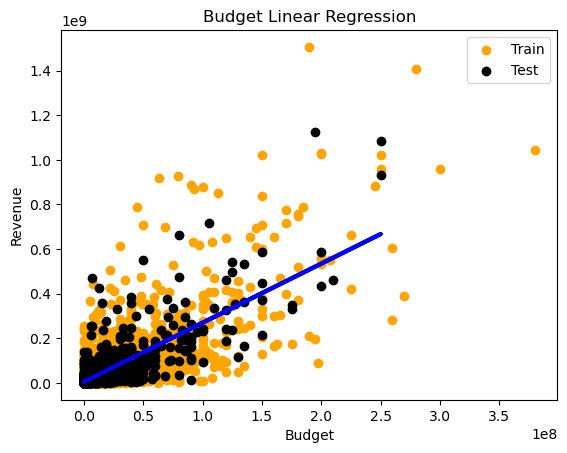

In [6]:
lin_reg("budget")

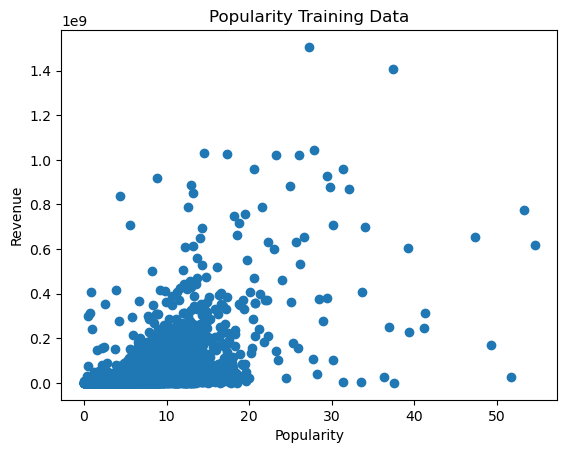

Mean squared error on train:  1.1984302321120822e+16
R² score on train:  0.2922027641203757
Mean squared error on test:  1.3327017142185472e+16
R² score on test:  0.1913078750204953
Coefficient parameter:  [12187587.23853035]
Intercept parameter:  -32937442.114362054


In [7]:
graph("popularity")

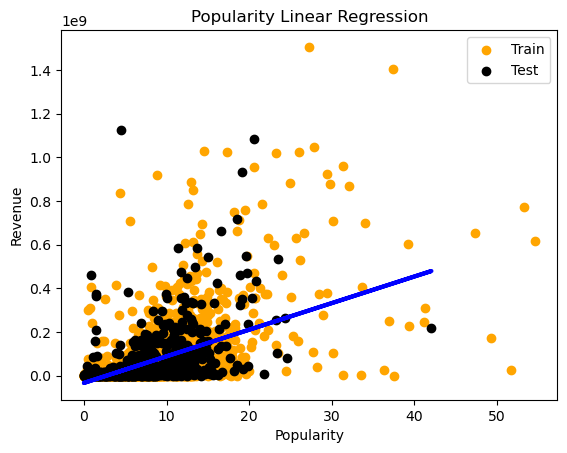

In [8]:
lin_reg("popularity")

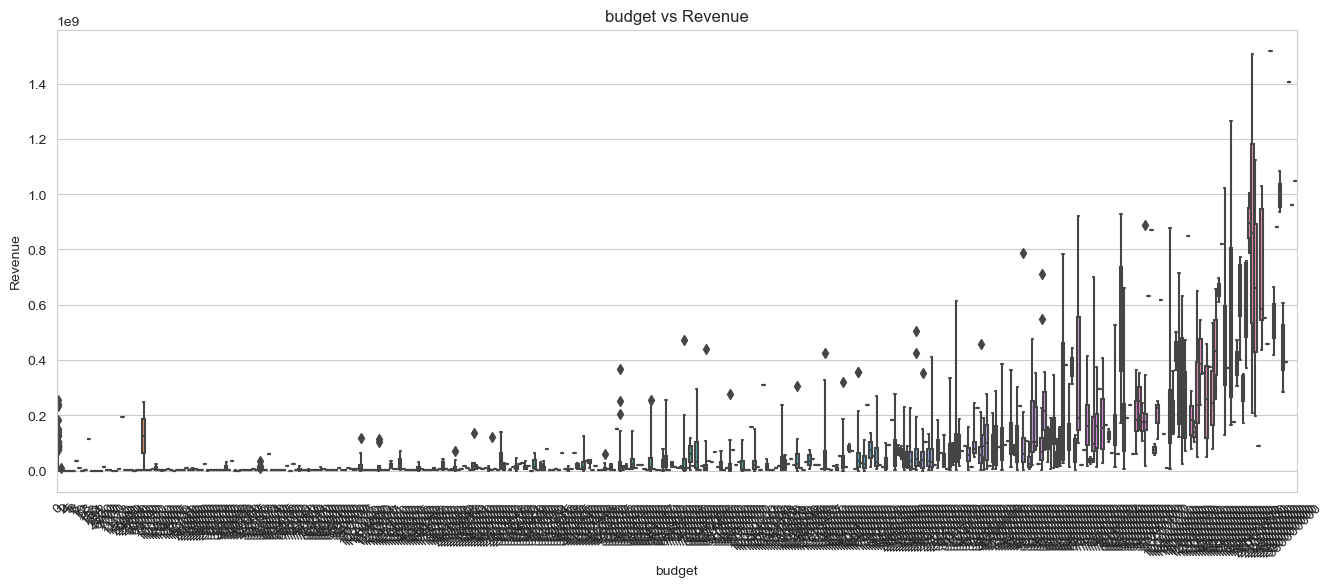

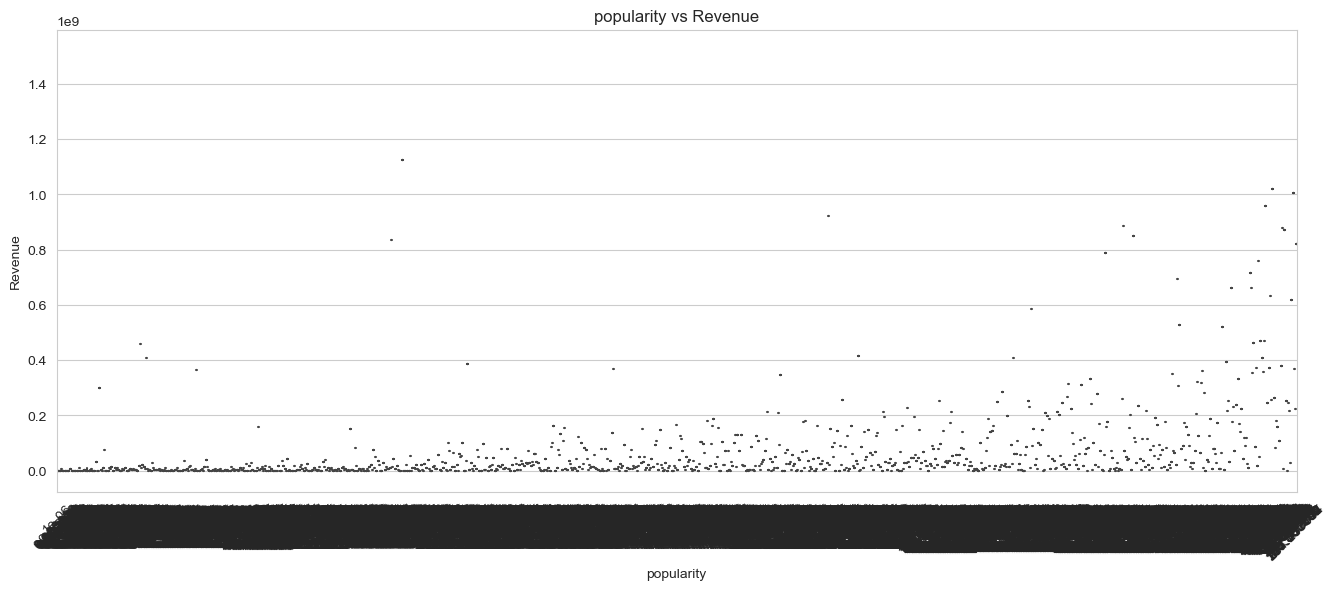

In [9]:
categorical_columns = np.array(["budget", "popularity"])

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting each categorical feature against Price using boxplots
for col in categorical_columns:
    plt.figure(figsize=(16, 6))
    sns.boxplot(x=col, y='revenue', data=df, whis=5)
    plt.xlabel(col)
    plt.ylabel('Revenue')
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45) 
    plt.show()

In [10]:
X_arr= feature_arr
y_arr = df["revenue"]
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, random_state=42, test_size=0.2)
model = BayesianRidge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
#print(f'Model Accuracy: {model.score(X_test, y_test)}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7302530151547897.0
R-squared: 0.5658397525072745


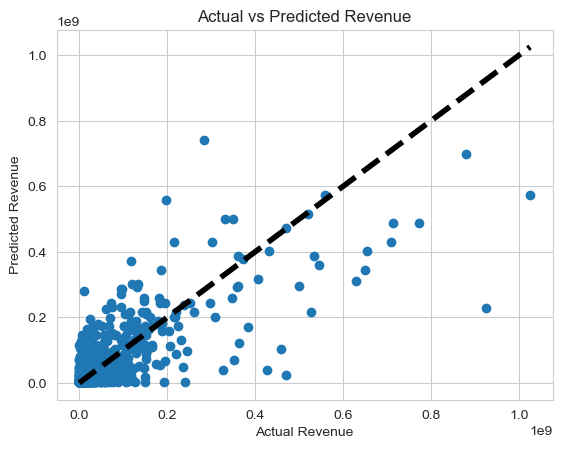

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Revenue')
plt.show()

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6623127928604117.0
R-squared: 0.6062325247572947


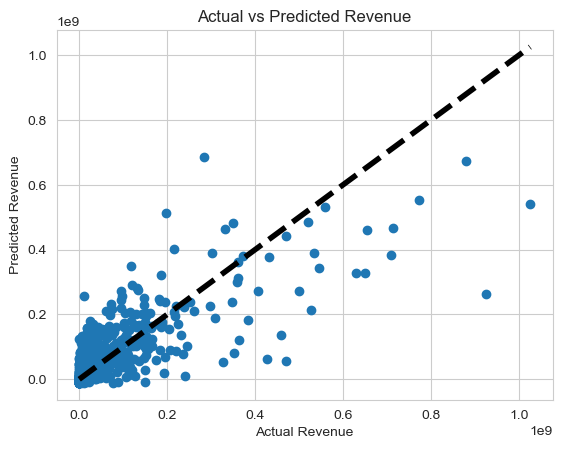

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Revenue')
plt.show()

In [14]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
#print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
#print(f'Model Accuracy: {model.score(X_test, y_test)}')
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6066777290300582.0
R-squared: 0.6393094619017992


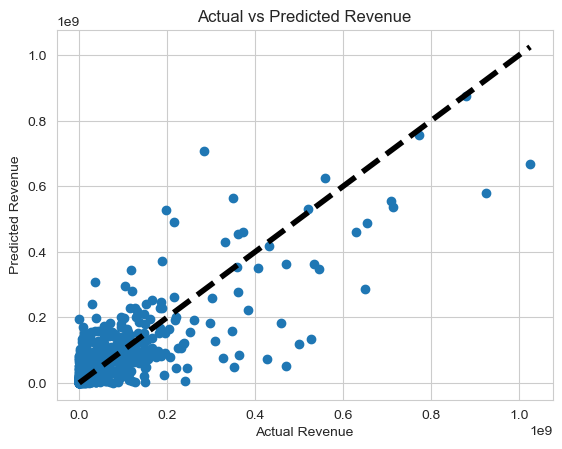

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Actual vs Predicted Revenue')
plt.show()

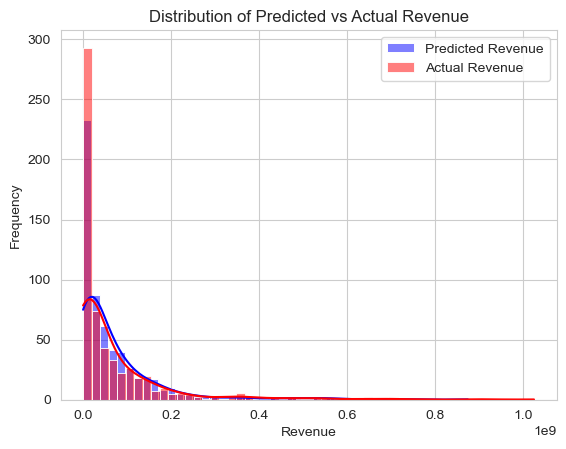

In [16]:
sns.histplot(y_pred, color="blue", label="Predicted Revenue", kde=True)
sns.histplot(y_test, color="red", label="Actual Revenue", kde=True)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted vs Actual Revenue')
plt.legend()
plt.show()

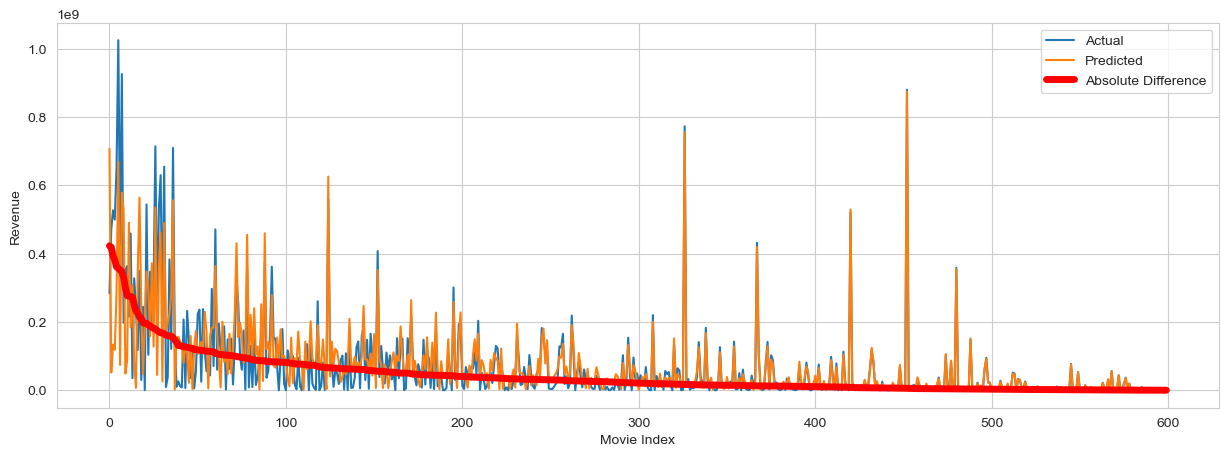

In [21]:
df_differences = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})
df_differences['Absolute Difference'] = abs(df_differences['Actual'] - df_differences['Predicted'])
df_differences = df_differences.sort_values('Absolute Difference', ascending=False)
df_differences = df_differences.reset_index(drop=True)
df_differences.head(10)

plt.figure(figsize=(15, 5))
plt.plot(df_differences['Actual'], label='Actual')
plt.plot(df_differences['Predicted'], label='Predicted')
plt.plot(df_differences['Absolute Difference'], label='Absolute Difference', color='red', linewidth=5)
plt.xlabel('Movie Index')
plt.ylabel('Revenue')
plt.legend()